# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [56]:
import pandas as pd

filmi = pd.read_csv('../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv', index_col='id')
# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10
%matplotlib inline

# izberemo interaktivni "notebook" stil risanja
import matplotlib.pyplot as plt

# naložimo razpredelnico, s katero bomo delali

Poglejmo si podatke.

In [57]:
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [58]:
filmi.sort_values('ocena')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
7221896,Cumali Ceber: Allah Seni Alsin,100,2017,1.0,NaN,37659,NaN,NaN,Cumali Ceber goes to a vacation with his child...
7886848,Sadak 2,133,2020,1.1,NaN,57957,NaN,NaN,"The film picks up where Sadak left off, revolv..."
4009460,Saving Christmas,79,2014,1.4,18.0,14855,2783970.0,PG,His annual Christmas party faltering thanks to...
5988370,Reis,108,2017,1.4,NaN,72207,NaN,NaN,A drama about the early life of Recep Tayyip E...
6038600,Smolensk,120,2016,1.4,NaN,7630,NaN,NaN,Inspired by true events of 2010 Polish Air For...
...,...,...,...,...,...,...,...,...,...
252488,Hababam Sinifi Sinifta Kaldi,91,1976,9.0,NaN,21288,NaN,NaN,A young and beautiful female teacher starts wo...
5354160,Aynabaji,147,2016,9.1,NaN,21429,NaN,NaN,Ayna is an actor and the prison is his stage. ...
68646,Boter,175,1972,9.2,100.0,1582906,134966411.0,NaN,The aging patriarch of an organized crime dyna...


Poberite stolpec ocen.

In [59]:
ocena = filmi['ocena']

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [60]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [61]:
zaokrozeni = round(filmi[['ocena']])


Dodajte zaokrožene vrednosti v podatke.

In [62]:
filmi['zaokrozeni'] = zaokrozeni
filmi.head()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis,zaokrozeni
id,,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...,6.0
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ...",8.0
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe...",7.0
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce...",8.0
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev...",8.0


Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [63]:
filmi.drop(columns='zaokrozeni')

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
id,,,,,,,,,
4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...
11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [64]:
kopija = filmi[['naslov', 'leto', 'glasovi']].copy()
kopija['zaokrozeni'] = round(filmi[['ocena']])

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [65]:
kopija[(kopija['leto'] > 2017) | (kopija['leto'] < 1930)]

,naslov,leto,glasovi,zaokrozeni
id,,,,
4972,The Birth of a Nation,1915,22363,6.0
6864,Intolerance: Love's Struggle Throughout the Ages,1916,13970,8.0
9968,Broken Blossoms or The Yellow Man and the Girl,1919,9296,7.0
10323,Das Cabinet des Dr. Caligari,1920,56089,8.0
12349,The Kid,1921,110278,8.0
...,...,...,...,...
11390036,A Fall from Grace,2020,10414,6.0
11905962,Sputnik,2020,8285,6.0
12393526,Bulbbul,2020,8381,7.0


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [66]:
def two_word(string):
    sez = string.split()
    return len(sez) <= 2
kopija[(kopija['zaokrozeni'] > 8) & (kopija['naslov'].apply(two_word))]

,naslov,leto,glasovi,zaokrozeni
id,,,,
38650,Cudovito zivljenje,1946,390492,9.0
47478,Sedem samurajev,1954,310090,9.0
48473,Pather Panchali,1955,22546,9.0
56058,Seppuku,1962,38581,9.0
68646,Boter,1972,1582906,9.0
...,...,...,...,...
7060344,Ratsasan,2018,20341,9.0
7738784,Peranbu,2018,11866,9.0
8176054,Pariyerum Perumal,2018,7665,9.0


### Histogrami

Združite filme po ocenah in jih preštejte.

In [67]:
kopija.groupby('zaokrozeni').size()


zaokrozeni
1.0       5
2.0      40
3.0      56
4.0     221
5.0     829
6.0    3220
7.0    3534
8.0    2029
9.0      66
dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot:xlabel='zaokrozeni'>

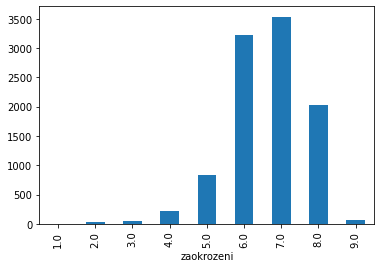

In [72]:
kopija.groupby('zaokrozeni').size().plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

array([[<AxesSubplot:title={'center':'dolzina'}>,
        <AxesSubplot:title={'center':'leto'}>,
        <AxesSubplot:title={'center':'ocena'}>],
       [<AxesSubplot:title={'center':'metascore'}>,
        <AxesSubplot:title={'center':'glasovi'}>,
        <AxesSubplot:title={'center':'zasluzek'}>],
       [<AxesSubplot:title={'center':'zaokrozeni'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

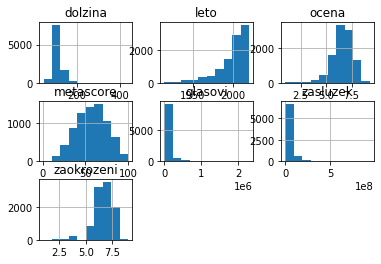

In [73]:
filmi.hist()

### Izris povprečne dolžine filma glede na leto

<AxesSubplot:xlabel='leto'>

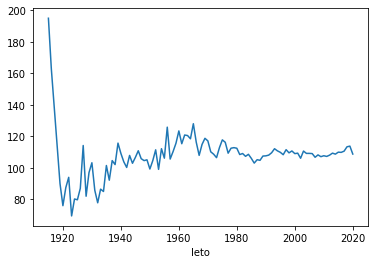

In [69]:
filmi.groupby('leto')['dolzina'].mean().plot()


### Izris skupnega zasluzka za posamezno leto

<AxesSubplot:xlabel='leto'>

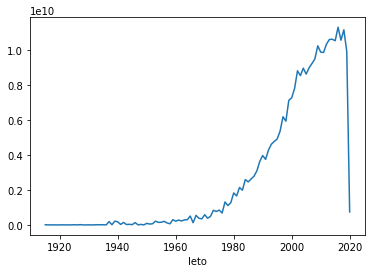

In [70]:
filmi.groupby('leto')['zasluzek'].sum().plot()